# Quantum Galton Board Experiments

This notebook explores quantum implementations of the Galton board, where quantum circuits simulate the probabilistic path of a particle through a series of binary decisions (left or right turns). We implement and visualize in this notebook:

- One-, two-, and N-layer quantum Galton boards
- Fast and full quantum circuit variants

Our goal is to investigate the emergence of different probability distributions and their quantum approximations. We show results from quantum circuits against binomial and gaussian plots.


The below cell initialises the working directory to the project root in order to import modules from src, utils etc.

In [1]:
import os
os.chdir("..")
print(os.getcwd())

/home/ismail/quantum_python/quantum_nnl_project


In [2]:
from src.galton_box import *
from utils.plot_utils import *

## One-Layer Quantum Galton Board

This version models a single peg where a "ball" (qubit) can fall left or right with equal probability. We implement two methods:

- **Full model**: Uses 4 qubits to simulate explicit routing and peg behavior using a CSWAP-CNOT-CSWAP structure and ancilla logic.
- **Fast model**: Uses a single Hadamard gate to simulate a balanced coin toss, extracting the probability of a left/right outcome directly.

This demonstrates how a single quantum gate can model probabilistic decisions.
IIINCLUDE SHOTS LOW HIGH AND BOTH FULL, AND FAST

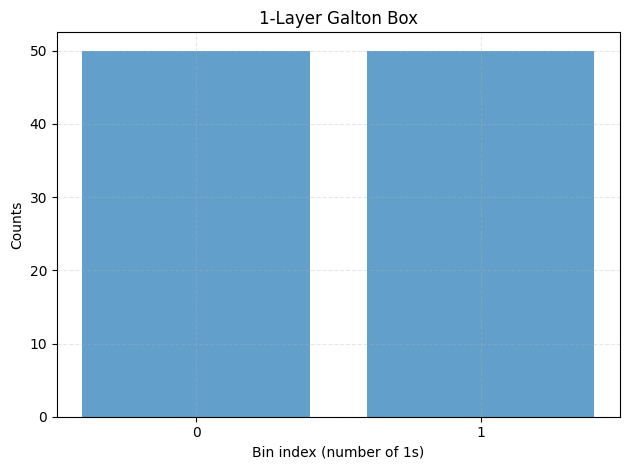

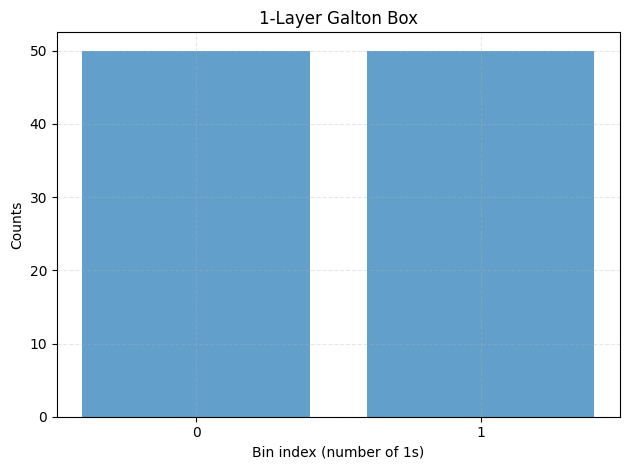

In [4]:
# One layer board, 100 shots, fast
bin_counts = galton_one_layer(mode="fast", shots=100)
plot_bins(bin_counts, n=1, shots=100)

# One layer board, 100 shots, full
bin_counts = galton_one_layer(shots=100, mode="full")
plot_bins(bin_counts, n=1, shots=100)

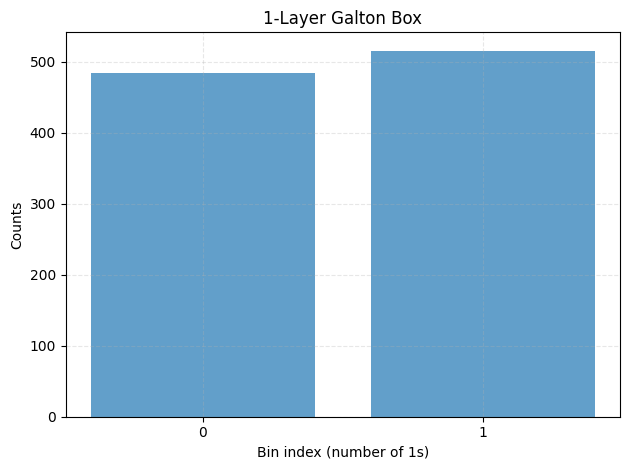

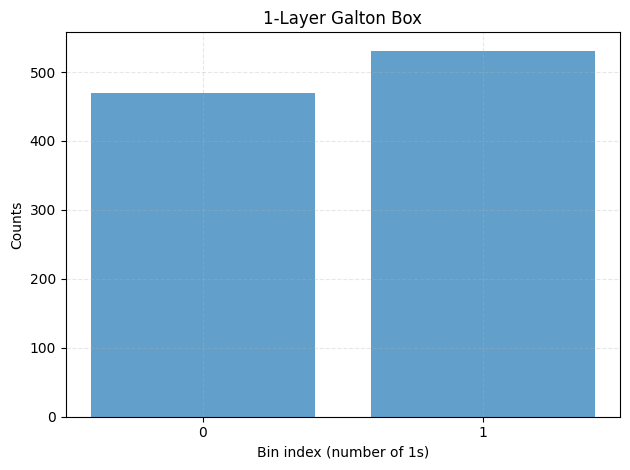

In [5]:
# One layer board, 1000 shots, fast
bin_counts = galton_one_layer(mode="fast")
plot_bins(bin_counts, n=1)

# One layer board, 1000 shots. full
bin_counts = galton_one_layer(mode="full")
plot_bins(bin_counts, n=1)

## Two-Layer Quantum Galton Board

We extend the fast system to two layers by applying two Hadamard gates to two qubits. Measuring the resulting bitstring gives insight into how many times the particle "turned right". The number of right turns (i.e., qubits measured as 1) determines the final bin position.

This simple model gives rise to a binomial distribution, showing quantum randomness accumulating with circuit depth.

The full model of this circuit uses the previous CSWAP-CNOT-CWAP structure, but with 3 output channels and 3 ancillae qubits. We repeat the structure 3 times, once on layer one as before, then we reset the control qubit and superpose it again, then once for each peg on layer two, with the only difference being an additional CNOT between the logic of each peg. We measure only the three output channels qubits to obtain the binning outcomes.

We additionally show the binomial distribution over the obtained results, which should be approximately equal.

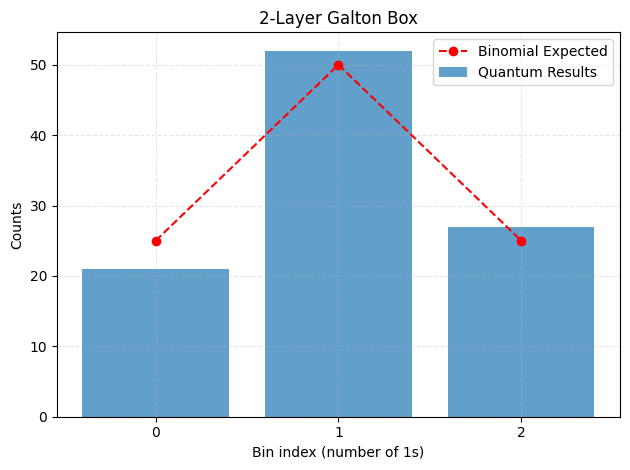

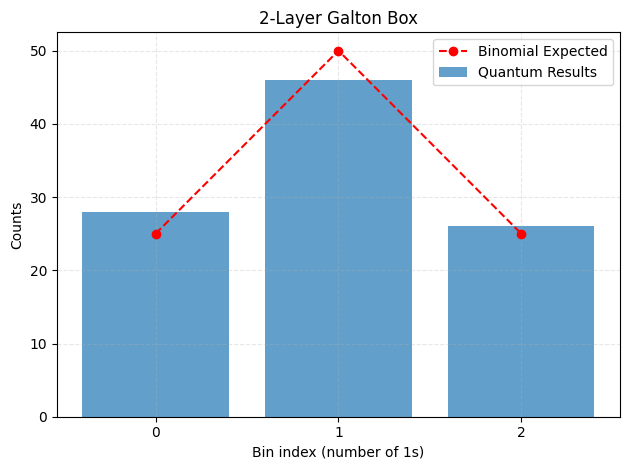

In [6]:
# 2-Layer Galton Board, shots = 100, fast
bin_counts = galton_two_layer(shots=100, mode="fast")
plot_bins(bin_counts, n=2, overlay='binomial', shots=100)

# 2-Layer Galton Board, shots = 100, full
bin_counts = galton_two_layer(shots=100, mode="full")
plot_bins(bin_counts, n=2, overlay='binomial', shots=100)

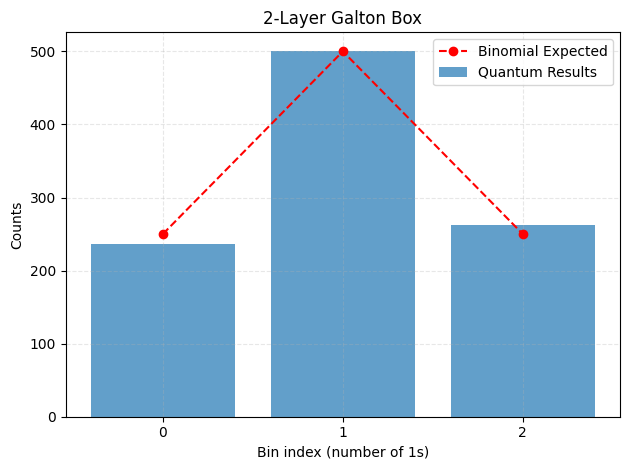

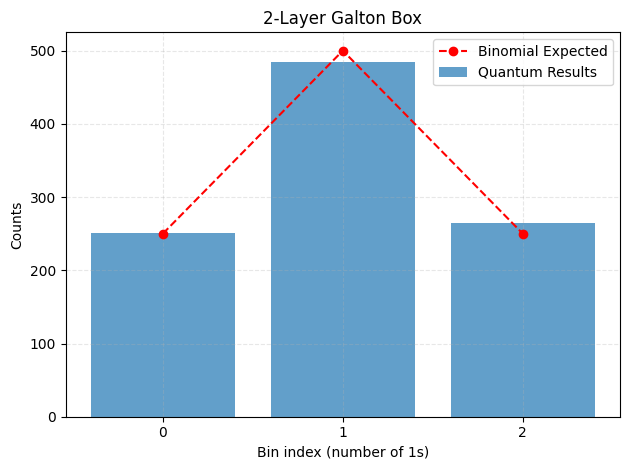

In [8]:
# 2-Layer Galton Board, shots = 1000, fast
bin_counts = galton_two_layer(mode="fast")
plot_bins(bin_counts, n=2, overlay='binomial', shots=1000)

# 2-Layer Galton Board, shots = 1000, full
bin_counts = galton_two_layer(mode="full")
plot_bins(bin_counts, n=2, overlay='binomial', shots=1000)

## N-Layer Quantum Galton Board

As before, we contrast two approaches to simulating the board:

- **Fast method**: Applies `n` Hadamard gates on `n` qubits, with no routing logic. Simple, efficient, and ideal for idealized sampling.
- **Full circuit model**: Introduces ancillas, routing, and swap logic (CSWAP, CNOT), mimicking the actual behavior of a particle navigating a network.

This comparison is important for understanding the trade-off between physical realism and circuit complexity

Fast is a generalization of the above, where each qubit models a peg/decision point. Each Hadamard gate creates a superposition of left/right, and the final state represents a path through the board. The number of 1s in the measurement determines the final bin — akin to counting how often the ball turned right.

This results in a binomial distribution that approximates a Gaussian for large `n`, showcasing the quantum version of the Central Limit Theorem.

Our full version uses the same structure as the two layer board, generalising to `n` layers by following the same CSWAP-CNOT-CSWAP structure, with CNOT applied between the logic of each peg and the control qubit reset after each layer. 

We show here that the full version requires significantly more computational space, meaning we can simulate a much higher number of board layers in our "fast" simulation.

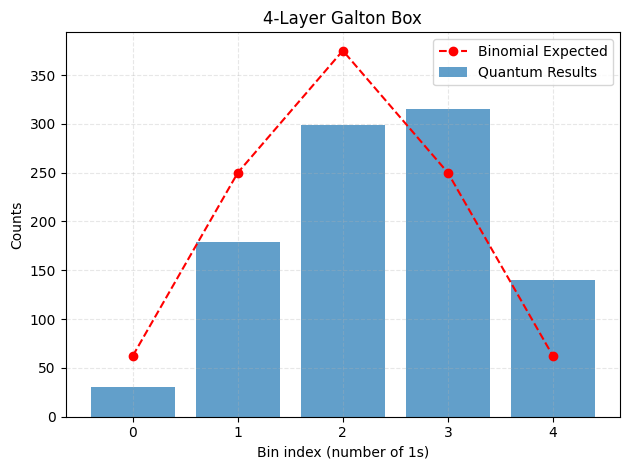

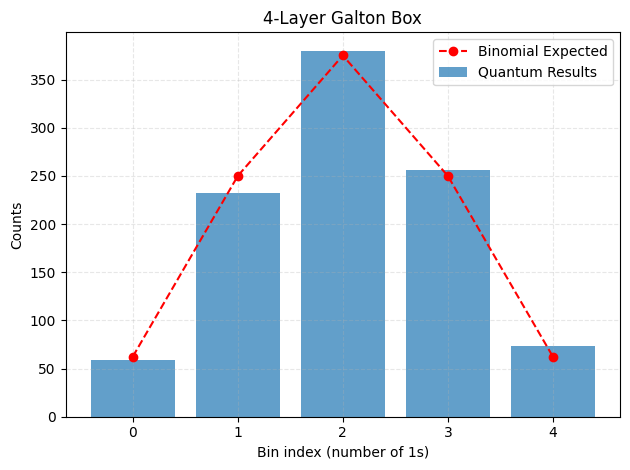

In [10]:
# 4-Layer Galton Board, shots = 1000, fast
bin_counts = galton_n_layer(5, shots=1000, mode="fast")
plot_bins(bin_counts, n=4, overlay='binomial', shots=1000)

# 4-Layer Galton Board, shots = 1000, full
bin_counts = galton_n_layer(4, shots=1000)
plot_bins(bin_counts, n=4, overlay='binomial', shots=1000)

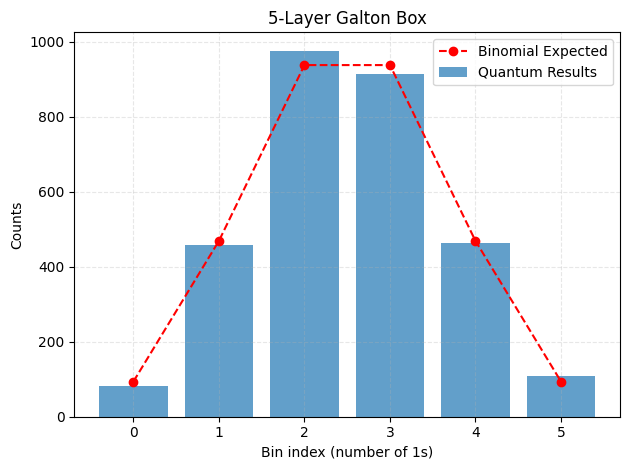

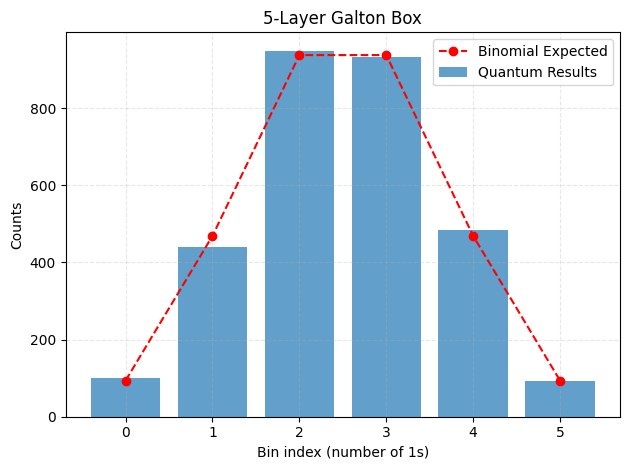

In [11]:
# 5-Layer Galton Board, shots = 3000, fast
bin_counts = galton_n_layer(5, shots=3000, mode="fast")
plot_bins(bin_counts, n=5, overlay='binomial', shots=3000)

# 5-Layer Galton Board, shots = 3000, full
bin_counts = galton_n_layer(5, shots=3000)
plot_bins(bin_counts, n=5, overlay='binomial', shots=3000)

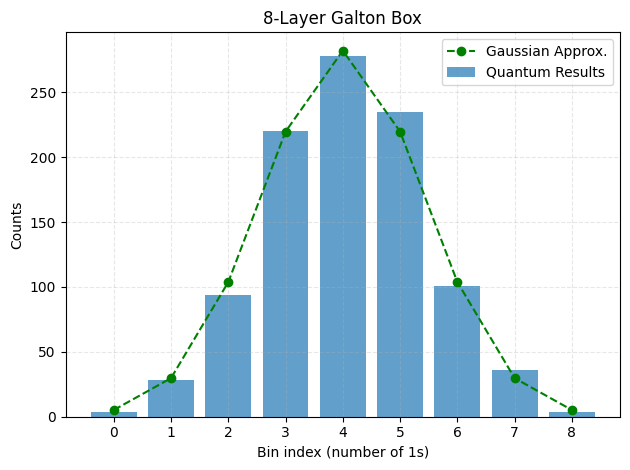

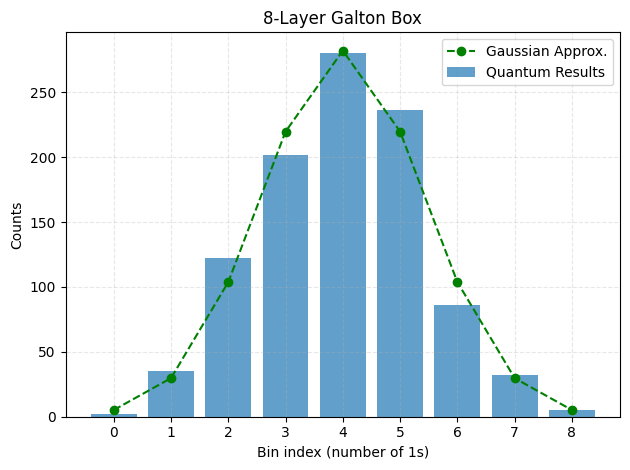

In [12]:
# 8-Layer Galton Board, shots = 1000, fast
bin_counts = galton_n_layer(8, shots=1000, mode="fast")
plot_bins(bin_counts, n=8, overlay='gaussian', shots=1000)

# 8-Layer Galton Board, shots = 1000, full
bin_counts = galton_n_layer(8, shots=1000)
plot_bins(bin_counts, n=8, overlay='gaussian', shots=1000)

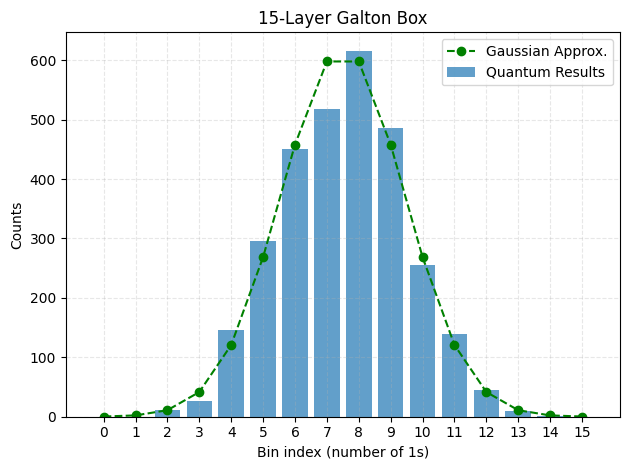

In [13]:
# 15-Layer Galton Board, shots = 3000, fast
bin_counts = galton_n_layer(15, mode="fast", shots=3000)
plot_bins(bin_counts, n=15, overlay='gaussian', shots=3000)